### Dimentionality Reduction

Dimensionality reduction is the process of reducing the dimensionality of the feature space with consideration by obtaining a set of principal features. This helps in avoiding curse of dimensionality and reduces overfitting and computational time.

1. PCA with and without scaling
2. LDA


* Input : Smote+TomekLink class balanced datasets - x_train_smtom.csv, y_train_smtom.csv, x_test_c4.csv and y_test_c4.csv
* Outcome : LDA performed better compared to PCA

In [1]:
from __future__ import print_function 
import time

# Import libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
import random
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Import Scaling and DR libraries
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import models from sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import cohen_kappa_score
from sklearn import model_selection

In [2]:
x_train=pd.read_csv('x_train_smtom.csv')
x_test=pd.read_csv('x_test_c4.csv')

y_train=pd.read_csv('y_train_smtom.csv')
y_test=pd.read_csv('y_test_c4.csv')

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31664, 29) (9000, 29) (31664, 1) (9000, 1)


### 1. Principal Component Analysis (PCA)

PCA is an unsupervised linear transformation techniques. 

#### 1. PCA without feature scaling

In [3]:
# Make an instance of the Model
pca = PCA()

#Fitting on the training set only. Apply the mapping (transform) to both the training set and the test set.
x_train_pca_noscale = pca.fit_transform(x_train)
x_test_pca_noscale = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.13056360e-01, 3.42880068e-01, 2.50507506e-02, 7.71539527e-03,
       4.07204360e-03, 3.05371255e-03, 2.35706747e-03, 7.98732785e-04,
       2.42582563e-04, 2.10848588e-04, 2.04923089e-04, 1.89492752e-04,
       1.68020645e-04, 2.17131147e-09, 6.87093004e-11, 1.79276263e-11,
       1.18743897e-11, 9.79423268e-12, 8.54231870e-12, 7.97188556e-12,
       5.83743208e-12, 4.23627321e-12, 4.17976057e-12, 3.14916879e-12,
       2.66165169e-12, 1.35219732e-12, 1.00036973e-12, 2.64233663e-13,
       2.11567775e-13])

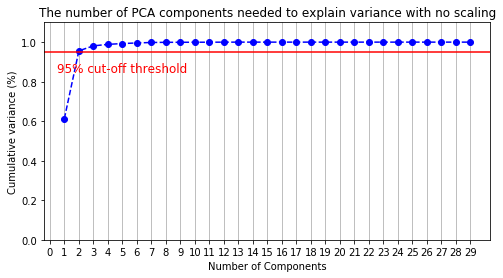

In [6]:
#Finalizing number of components (n_components) value

pca = PCA().fit(x_train_pca_noscale)
plt.rcParams["figure.figsize"] = (8,4)

fig, ax = plt.subplots()
xi = np.arange(1, 30, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of PCA components needed to explain variance with no scaling')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
ax.grid(axis='x')

plt.show()

#### 2. PCA with Standard Scaling

In [7]:
# Standardizing the features
scaler = StandardScaler()

# Fit on training set only. Apply transform to both the training set and the test set.
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

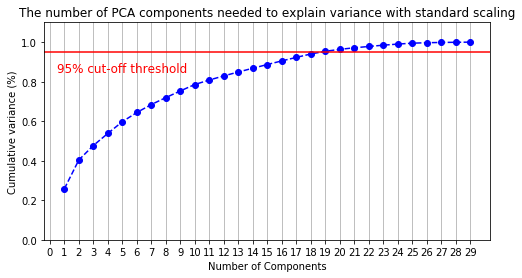

In [8]:
#Finalizing number of components (n_components) value

pca = PCA().fit(x_train_std)
plt.rcParams["figure.figsize"] = (8,4)

fig, ax = plt.subplots()
xi = np.arange(1, 30, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of PCA components needed to explain variance with standard scaling')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
ax.grid(axis='x')

plt.show()

In [11]:
# Make an instance of the Model - considering n_components=19 from above graph
pca = PCA(n_components=19)

#you are fitting on the training set only
#Apply the mapping (transform) to both the training set and the test set.
x_train_pca_std = pca.fit_transform(x_train_std)
x_test_pca_std = pca.transform(x_test_std)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25827594, 0.14573507, 0.07300125, 0.06114582, 0.0593614 ,
       0.04648787, 0.04031325, 0.03506406, 0.03377316, 0.0324696 ,
       0.02275205, 0.02070788, 0.01978474, 0.01893644, 0.01888293,
       0.01827368, 0.01772488, 0.01725505, 0.01365458])

#### 3. PCA with MinMax Scaling

In [9]:
#Normalizing the features
minmax = MinMaxScaler()

# Fit on training set only. Apply transform to both the training set and the test set.
x_train_minmax = minmax.fit_transform(x_train)
x_test_minmax = minmax.transform(x_test)

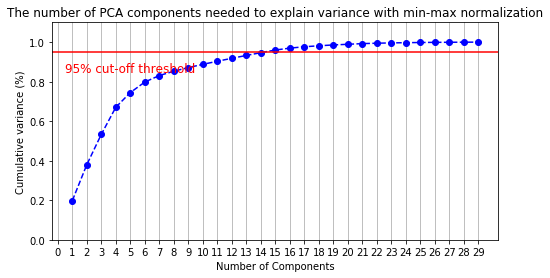

In [10]:
#Finalizing number of components (n_components) value

pca = PCA().fit(x_train_minmax)
plt.rcParams["figure.figsize"] = (8,4)

fig, ax = plt.subplots()
xi = np.arange(1, 30, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of PCA components needed to explain variance with min-max normalization')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
ax.grid(axis='x')

plt.show()

In [14]:
# Make an instance of the Model - considering n_components=14 from above graph
pca = PCA(n_components=14)

#Fitting on the training set only. Apply the mapping (transform) to both the training set and the test set.
x_train_pca_minmax = pca.fit_transform(x_train_minmax)
x_test_pca_minmax = pca.transform(x_test_minmax)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19839238, 0.18224331, 0.15314118, 0.13686898, 0.07415155,
       0.05334849, 0.03284677, 0.02167277, 0.01872784, 0.01609438,
       0.01573294, 0.01492566, 0.01445964, 0.01403497])

### 2. Linear discriminant analysis (LDA)

LDA is a supervised linear transformation techniques. 

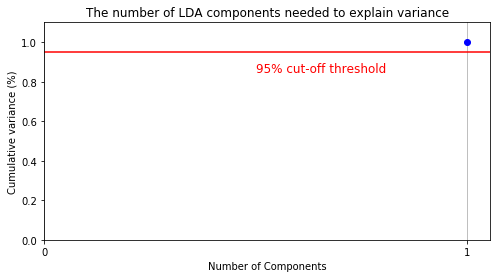

In [22]:
lda = LDA().fit(x_train, y_train)
plt.rcParams["figure.figsize"] = (8,4)

fig, ax = plt.subplots()
xi = np.arange(1, 2, step=1)
y = np.cumsum(lda.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 2, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of LDA components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
ax.grid(axis='x')

plt.show()

In [23]:
# Make an instance of the Model - considering n_components=1 from above graph
lda = LDA(n_components=1)

#Fitting on the training set only - both x and y. Apply the mapping (transform) to both the training set and the test set.
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

#### Function for model performance comparison

In [13]:
classifier = [
    ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(), XGBClassifier(),
    ensemble.GradientBoostingClassifier(), ensemble.RandomForestClassifier(), tree.DecisionTreeClassifier(),
    linear_model.LogisticRegressionCV(), naive_bayes.GaussianNB(), neighbors.KNeighborsClassifier(),svm.SVC(probability=True)
    ]

In [11]:
def models_comparison(x_train, y_train, x_test, y_test, folds):
    
    time_start = time.time()
    classifier_columns = []
    classifier_compare = pd.DataFrame(columns = classifier_columns)

    row_index = 0
    for alg in classifier:
    
        pred = alg.fit(x_train, y_train).predict(x_test)
        classifier_name = alg.__class__.__name__
        
        classifier_compare.loc[row_index,'ML Algorithm'] = classifier_name
        classifier_compare.loc[row_index, 'Train Accuracy'] = model_selection.cross_val_score(alg,x_train,y_train,cv=folds,scoring='accuracy').mean()
        classifier_compare.loc[row_index, 'Test Accuracy'] = model_selection.cross_val_score(alg,x_test,y_test,cv=folds,scoring='accuracy').mean()
        classifier_compare.loc[row_index, 'Precision'] = model_selection.cross_val_score(alg,x_test,y_test,cv=folds,scoring='precision').mean()
        classifier_compare.loc[row_index, 'Recall'] = model_selection.cross_val_score(alg,x_test,y_test,cv=folds,scoring='recall').mean()
        classifier_compare.loc[row_index, 'F1 score'] = model_selection.cross_val_score(alg,x_test,y_test,cv=folds,scoring='f1').mean()
        fp, tp, th = roc_curve(y_test, pred)
        classifier_compare.loc[row_index, 'ROC AUC'] = auc(fp, tp)       
        classifier_compare.loc[row_index, 'Kappa'] = cohen_kappa_score(y_test, pred, labels=None, weights=None, sample_weight=None)  
        roc_auc = auc(fp, tp)
        classifier_compare.loc[row_index, 'GINI'] = (2 * roc_auc) - 1
        tn, fp, fn, tp = confusion_matrix(y_test, pred, labels=[0,1]).ravel()
        classifier_compare.loc[row_index, 'Type II error'] = fn
        row_index+=1
    
    classifier_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)  
    print('Time elapsed: {} seconds'.format(time.time()-time_start))
    return classifier_compare

### Selecting best dimensionality reduction technique

In [26]:
#1 PCA without scaling

models_comparison(x_train_pca_noscale, y_train, x_test_pca_noscale, y_test, 10)

Time elapsed: 2254.131859779358 seconds


,ML Algorithm,Train Accuracy,Test Accuracy,Precision,Recall,F1 score,ROC AUC,Kappa,GINI,Type II error
6,LogisticRegressionCV,0.587039,0.784444,0.000000,0.000000,0.000000,0.597878,0.124991,0.195755,571.0
7,GaussianNB,0.574596,0.784444,0.000000,0.000000,0.000000,0.583964,0.103148,0.167927,542.0
9,SVC,0.594523,0.784444,0.000000,0.000000,0.000000,0.598428,0.134216,0.196856,684.0
0,AdaBoostClassifier,0.600966,0.784000,0.548333,0.007732,0.015188,0.603351,0.145931,0.206702,727.0
3,GradientBoostingClassifier,0.609778,0.781778,0.337197,0.011856,0.023766,0.599724,0.138184,0.199448,707.0
2,XGBClassifier,0.630780,0.769889,0.337654,0.068557,0.113615,0.593531,0.135645,0.187062,800.0
8,KNeighborsClassifier,0.644360,0.748778,0.314702,0.140206,0.193586,0.572791,0.110856,0.145583,939.0
1,BaggingClassifier,0.626485,0.720444,0.291860,0.194330,0.225115,0.555020,0.088583,0.110041,1075.0
4,RandomForestClassifier,0.633244,0.719667,0.286066,0.206701,0.239840,0.561126,0.094558,0.122253,998.0
5,DecisionTreeClassifier,0.615148,0.683444,0.264594,0.272680,0.267166,0.556075,0.085179,0.112149,986.0


In [27]:
#2 PCA with Standard scaling

models_comparison(x_train_pca_std, y_train, x_test_pca_std, y_test, 10)

Time elapsed: 4090.08206987381 seconds


,ML Algorithm,Train Accuracy,Test Accuracy,Precision,Recall,F1 score,ROC AUC,Kappa,GINI,Type II error
6,LogisticRegressionCV,0.848644,0.823111,0.684919,0.332990,0.447913,0.651724,0.358454,0.303448,1237.0
9,SVC,0.847760,0.821111,0.674703,0.331443,0.443713,0.662197,0.375080,0.324393,1184.0
3,GradientBoostingClassifier,0.840716,0.819667,0.649140,0.358247,0.461079,0.672475,0.380276,0.344950,1104.0
4,RandomForestClassifier,0.860328,0.817556,0.635530,0.344330,0.444761,0.658595,0.356055,0.317190,1165.0
0,AdaBoostClassifier,0.822809,0.813889,0.617750,0.361340,0.455561,0.641395,0.306880,0.282790,1182.0
2,XGBClassifier,0.847759,0.810111,0.598308,0.363918,0.452265,0.658209,0.353410,0.316419,1161.0
7,GaussianNB,0.683590,0.805667,0.562655,0.456186,0.503412,0.586561,0.109663,0.173123,591.0
1,BaggingClassifier,0.840149,0.801333,0.569301,0.315464,0.413945,0.635582,0.305867,0.271165,1240.0
8,KNeighborsClassifier,0.842009,0.789556,0.521371,0.303093,0.382715,0.628486,0.269409,0.256971,1184.0
5,DecisionTreeClassifier,0.787973,0.735000,0.393161,0.414948,0.410641,0.608230,0.204172,0.216460,1123.0


In [28]:
#3 PCA with MinMax scaling

models_comparison(x_train_pca_minmax, y_train, x_test_pca_minmax, y_test, 10)

Time elapsed: 2430.184732198715 seconds


,ML Algorithm,Train Accuracy,Test Accuracy,Precision,Recall,F1 score,ROC AUC,Kappa,GINI,Type II error
6,LogisticRegressionCV,0.837845,0.804333,0.637480,0.218041,0.323984,0.616888,0.289178,0.233777,1387.0
3,GradientBoostingClassifier,0.839991,0.803111,0.602139,0.262371,0.364779,0.631005,0.310121,0.262010,1302.0
0,AdaBoostClassifier,0.833075,0.802333,0.599599,0.256701,0.358459,0.628056,0.300679,0.256113,1303.0
7,GaussianNB,0.796857,0.800778,0.576552,0.292268,0.387397,0.517107,0.046694,0.034213,1778.0
9,SVC,0.831277,0.799444,0.639178,0.162887,0.258989,0.604114,0.256508,0.208228,1422.0
4,RandomForestClassifier,0.854235,0.797333,0.567905,0.245361,0.342925,0.625524,0.295122,0.251048,1312.0
2,XGBClassifier,0.839360,0.788111,0.516207,0.267010,0.351293,0.632241,0.304230,0.264483,1270.0
1,BaggingClassifier,0.842297,0.785889,0.528446,0.253093,0.354781,0.612984,0.261333,0.225969,1334.0
8,KNeighborsClassifier,0.828053,0.782000,0.491239,0.280412,0.356741,0.620716,0.252970,0.241433,1207.0
5,DecisionTreeClassifier,0.797481,0.716111,0.347189,0.354124,0.358445,0.599943,0.190216,0.199886,1159.0


In [29]:
#4 LDA

models_comparison(x_train_lda, y_train, x_test_lda, y_test, 10)

Time elapsed: 1622.0126521587372 seconds


,ML Algorithm,Train Accuracy,Test Accuracy,Precision,Recall,F1 score,ROC AUC,Kappa,GINI,Type II error
0,AdaBoostClassifier,0.850443,0.818667,0.668785,0.329897,0.438042,0.665093,0.374573,0.330186,1156.0
9,SVC,0.850411,0.818667,0.666470,0.319072,0.431292,0.661217,0.373946,0.322434,1190.0
3,GradientBoostingClassifier,0.852242,0.818556,0.661892,0.325773,0.436176,0.665951,0.374534,0.331902,1148.0
6,LogisticRegressionCV,0.851232,0.818444,0.696339,0.282474,0.401390,0.668582,0.376422,0.337163,1129.0
7,GaussianNB,0.845770,0.818333,0.662745,0.321134,0.432339,0.650220,0.359104,0.300441,1253.0
2,XGBClassifier,0.852274,0.812556,0.637323,0.305670,0.412719,0.670417,0.381476,0.340834,1126.0
8,KNeighborsClassifier,0.832062,0.792222,0.531655,0.319072,0.398269,0.654620,0.326447,0.309240,1112.0
1,BaggingClassifier,0.787815,0.742667,0.396695,0.342268,0.368450,0.625012,0.236038,0.250023,1073.0
5,DecisionTreeClassifier,0.779887,0.729556,0.374368,0.372165,0.372700,0.624460,0.227063,0.248919,1032.0
4,RandomForestClassifier,0.780045,0.729333,0.374928,0.371649,0.372510,0.625001,0.228166,0.250001,1031.0


#### Conclusion

In [ ]:
# PCA worked better with scaling, especially with Standard scalar. PCA with Min-max scaling and PCA without any scaling 
    #showed poor results
# LDA and PCA with standard scalar delivered similiar results however LDA showed slightly best results comparatively 
    #for Logistic regression, Naive Bayes, KNN and SVM algorithms compared to PCA.
# For tree based, any dimensionality technique is not considered due to its reduced performance. 

### 3. Combination of Feature Selection and Dimensionality Reduction techniques

In [4]:
# Considering finalized set of feature selection

fs_set3=['LIMIT_BAL','PAY_AMT1', 'PAY_1', 'PAY_AMT2', 'AGE', 'SEX_2',
         'PAY_3', 'MARRIAGE_2', 'BILL_AMT1', 'MARRIAGE_1', 'PAY_2', 'SEX_1', 'EDUCATION_2', 'EDUCATION_1']

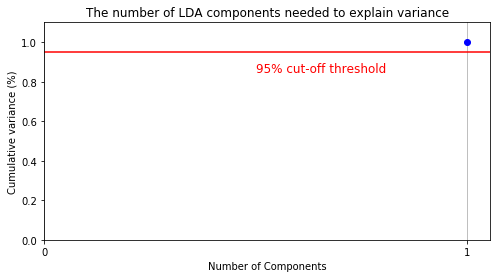

In [6]:
# Considering best DR technique

lda = LDA().fit(x_train[fs_set3], y_train)
plt.rcParams["figure.figsize"] = (8,4)

fig, ax = plt.subplots()
xi = np.arange(1, 2, step=1)
y = np.cumsum(lda.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 2, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of LDA components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
ax.grid(axis='x')

plt.show()

In [14]:
# Make an instance of the Model - considering n_components=1 from above graph
lda = LDA(n_components=1)

#Fitting on the training set only - both x and y. Apply the mapping (transform) to both the training set and the test set.
x_train_lda_fs = lda.fit_transform(x_train[fs_set3], y_train)
x_test_lda_fs = lda.transform(x_test[fs_set3])

In [15]:
models_comparison(x_train_lda_fs, y_train, x_test_lda_fs, y_test, 10)

Time elapsed: 4257.97333073616 seconds


,ML Algorithm,Train Accuracy,Test Accuracy,Precision,Recall,F1 score,ROC AUC,Kappa,GINI,Type II error
0,AdaBoostClassifier,0.813996,0.806778,0.576979,0.399485,0.470870,0.659746,0.363057,0.319491,1174.0
9,SVC,0.811849,0.806667,0.603427,0.304639,0.403980,0.665278,0.365841,0.330557,1130.0
3,GradientBoostingClassifier,0.813270,0.806333,0.589051,0.343814,0.433354,0.668797,0.360720,0.337594,1082.0
2,XGBClassifier,0.813049,0.805000,0.597771,0.302062,0.399493,0.665100,0.350788,0.330201,1087.0
7,GaussianNB,0.808376,0.803778,0.601974,0.271134,0.372845,0.642105,0.336323,0.284210,1268.0
6,LogisticRegressionCV,0.812922,0.801889,0.616796,0.218557,0.321686,0.668518,0.352658,0.337036,1060.0
8,KNeighborsClassifier,0.787656,0.778667,0.479452,0.294845,0.364189,0.646404,0.286542,0.292808,1051.0
1,BaggingClassifier,0.744515,0.731333,0.358057,0.301031,0.330634,0.615335,0.206854,0.230671,1038.0
4,RandomForestClassifier,0.736114,0.712222,0.332528,0.329897,0.331762,0.615423,0.199006,0.230846,986.0
5,DecisionTreeClassifier,0.736051,0.711889,0.332373,0.331443,0.331772,0.615049,0.198489,0.230098,988.0


#### Conclusion

In [ ]:
# There is reduction in performance of ML models across almost all evaluation metrics upon combining Feature selection and
    # dimensionality techniques. Hence this concept is dropped here.